In [34]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
conn = sqlite3.connect('expenses.db')
cursor = conn.cursor()

In [36]:
# Create a table for expenses if it doesn't exist
cursor.execute('''
CREATE TABLE IF NOT EXISTS expenses (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    amount REAL,
    category TEXT,
    description TEXT,
    date TEXT
)
''')
conn.commit()

In [37]:
def add_expense(amount, category, description, date):
    cursor.execute('''
    INSERT INTO expenses (amount, category, description, date)
    VALUES (100,200,300)
    ''', (amount, category, description, date))
    conn.commit()

In [38]:
def edit_expense(expense_id, amount, category, description, date):
    cursor.execute('''
    UPDATE expenses
    SET amount = ?, category = ?, description = ?, date = ?
    WHERE id = ?
    ''', (amount, category, description, date, expense_id))
    conn.commit()

In [39]:
def delete_expense(expense_id):
    cursor.execute('''
    DELETE FROM expenses WHERE id = ?
    ''', (expense_id,))
    conn.commit()

In [40]:
def view_expenses():
    cursor.execute('SELECT * FROM expenses')
    return cursor.fetchall()

In [41]:
def generate_monthly_report(month, year):
    cursor.execute('''
    SELECT SUM(amount), category FROM expenses
    WHERE strftime('%m', date) = ? AND strftime('%Y', date) = ?
    GROUP BY category
    ''', (month, year))
    return cursor.fetchall()

In [42]:
def visualize_expenses(month, year):
    report_data = generate_monthly_report(month, year)
    categories, amounts = zip(*report_data)

    plt.figure(figsize=(10, 6))
    plt.bar(categories, amounts, color='blue')
    plt.title(f'Expenses for {month}/{year}')
    plt.xlabel('Category')
    plt.ylabel('Amount')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [43]:
# Adding expenses
add_expense(150, 'Food', 'Lunch', '2024-09-01')
add_expense(100, 'Transport', 'Bus ticket', '2024-09-02')
add_expense(260, 'Food', 'Snacks', '2024-09-03')
add_expense(200, 'Utilities', 'Electricity bill', '2024-09-04')
add_expense(300, 'bills', 'house rent', '2024-09-05')

In [44]:
edit_expense(1, 60, 'Food', 'Lunch at restaurant', '2024-09-01')

In [45]:
print("All Expenses:")
for expense in view_expenses():
    print(expense)


All Expenses:
(1, 60.0, 'Food', 'Lunch at restaurant', '2024-09-01')
(2, 100.0, 'Transport', 'Bus ticket', '2024-09-02')
(3, 20.0, 'Food', 'Snacks', '2024-09-03')
(4, 200.0, 'Utilities', 'Electricity bill', '2024-09-04')
(5, 300.0, 'bills', 'house rent', '2024-09-05')
(6, 150.0, 'Food', 'Lunch', '2024-09-01')
(7, 500.0, 'Transport', 'Bus ticket', '2024-09-02')
(8, 260.0, 'Food', 'Snacks', '2024-09-03')
(9, 200.0, 'Utilities', 'Electricity bill', '2024-09-04')
(10, 300.0, 'bills', 'house rent', '2024-09-05')
(11, 150.0, 'Food', 'Lunch', '2024-09-01')
(12, 100.0, 'Transport', 'Bus ticket', '2024-09-02')
(13, 260.0, 'Food', 'Snacks', '2024-09-03')
(14, 200.0, 'Utilities', 'Electricity bill', '2024-09-04')
(15, 300.0, 'bills', 'house rent', '2024-09-05')


In [46]:
month = '09'  # September
year = '2024'  # 2024
print("\nMonthly Report:")
monthly_report = generate_monthly_report(month, year)
for category in monthly_report:
    print(category)



Monthly Report:
(900.0, 'Food')
(700.0, 'Transport')
(600.0, 'Utilities')
(900.0, 'bills')


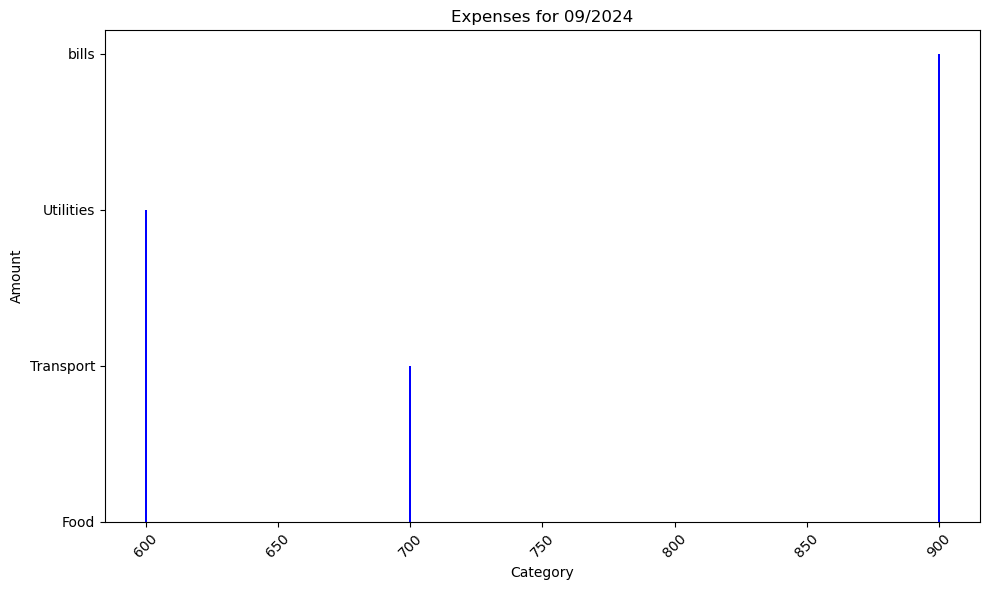

In [47]:
visualize_expenses(month, year)

In [48]:
conn.close()